In [1]:
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.join(dirPath, 'packages')

if not packagesPath in sys.path:
    sys.path.append(packagesPath)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2

train = True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import packages.dataset as dataset

datasetPath = os.path.join(dirPath, 'datasets')
dataProcessor = dataset.Brexit(datasetPath)
dataProcessor.loadFilePaths()

Dataset path:
/notebooks/paper2/datasets/brexit
Total files 48
-------------------------------
Training file count:  38
Total files in list:  38
-------------------------------
Total validation file count 4
Total files in list:  4
-------------------------------
Total test file count 6
Total files in list:  6
-------------------------------


In [3]:
from packages.gc.vocab import Vocab
vocabProcessor = Vocab(dataProcessor)
if train:
    vocabProcessor.buildVocab()

----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  259
Filtered local vocab:  4
----------------------
Total local vocab:  259
Filtered local vocab:  4
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  194
Filtered local vocab:  5
----------------------
Total local vocab:  194
Filtered local vocab:

In [4]:
from packages.gc.lda import LDA

ldaProcessor = LDA(dataProcessor)

if train:
    ldaProcessor.setNumberOfIterations(500)
    ldaProcessor.setPerplexity(10)
    ldaProcessor.setNumberOfTopics(10)
    ldaProcessor.buildWordCoOccurenceVectors()
    ldaProcessor.train()


Finished training LDA


In [5]:
from packages.gc.tsne import TSNE
tsneProcessor = TSNE(dataProcessor)

# TSNE is trained with word co-occurence matrix
if train:
    tsneProcessor.setNumberOfIterations(500)
    tsneProcessor.setPerplexity(10)
    tsneProcessor.setNumberOfTopics(10)
    tsneProcessor.train()


Trained for TSNE


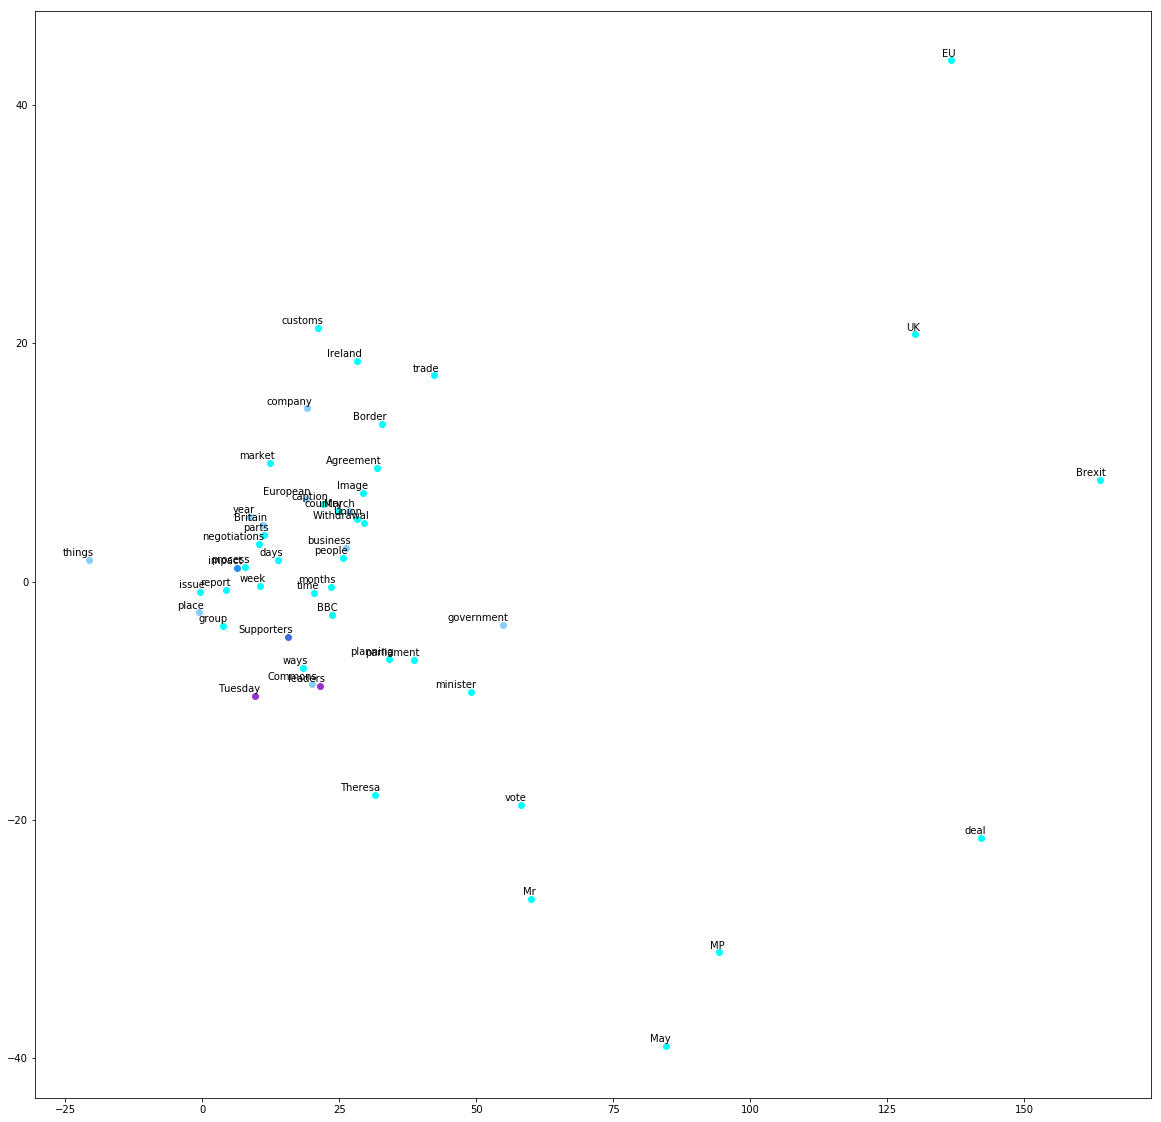

In [6]:
from packages.gc.plotter import Plotter

# Display TSNE word co-occurance trained points (all topic)

tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


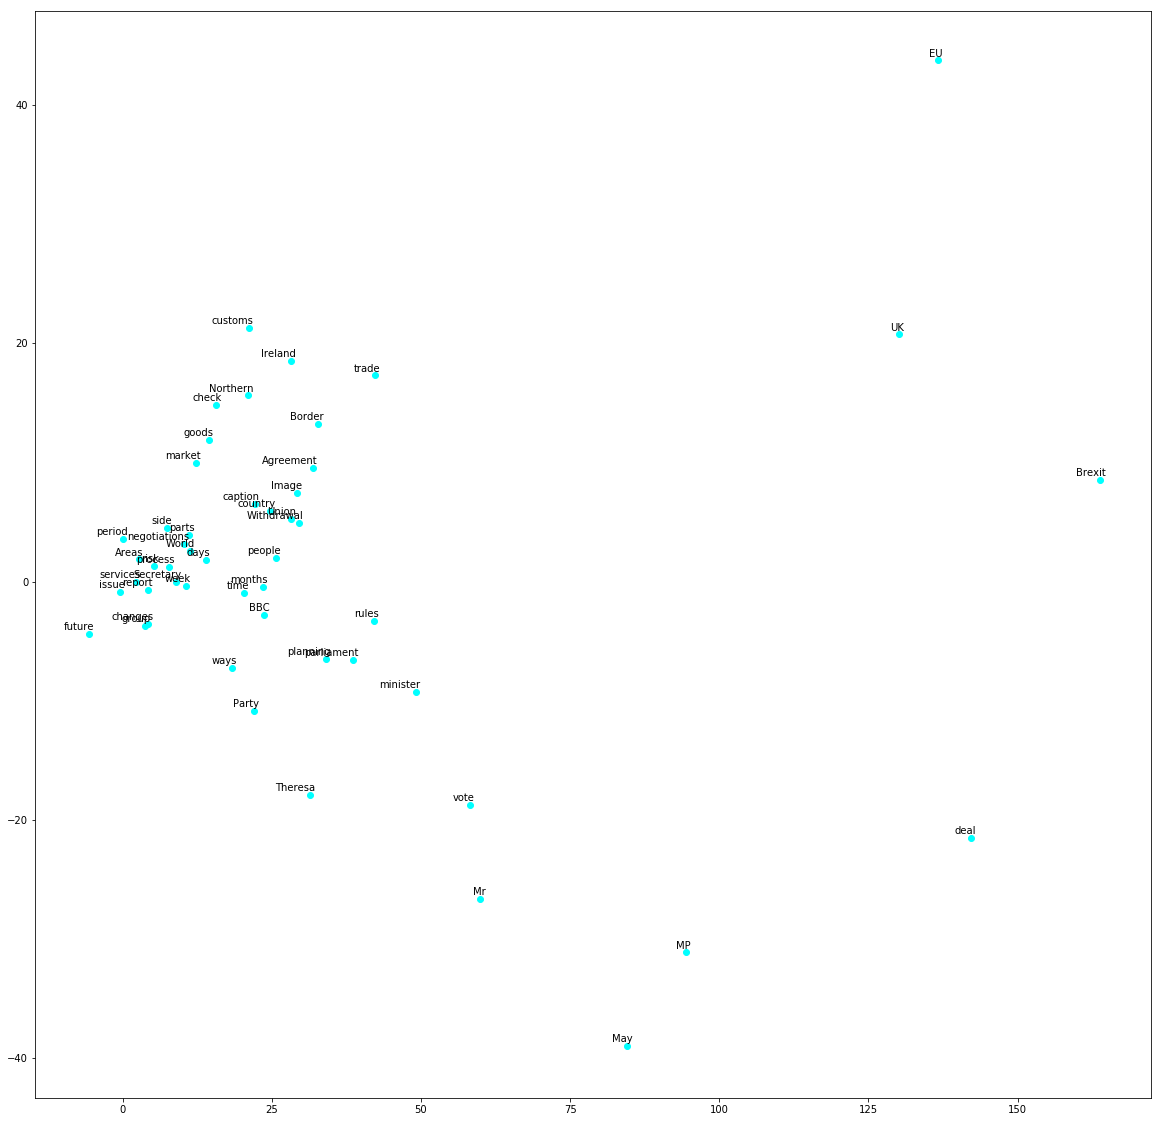

In [17]:
# Display TSNE word co-occurance trained points (all topic)

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


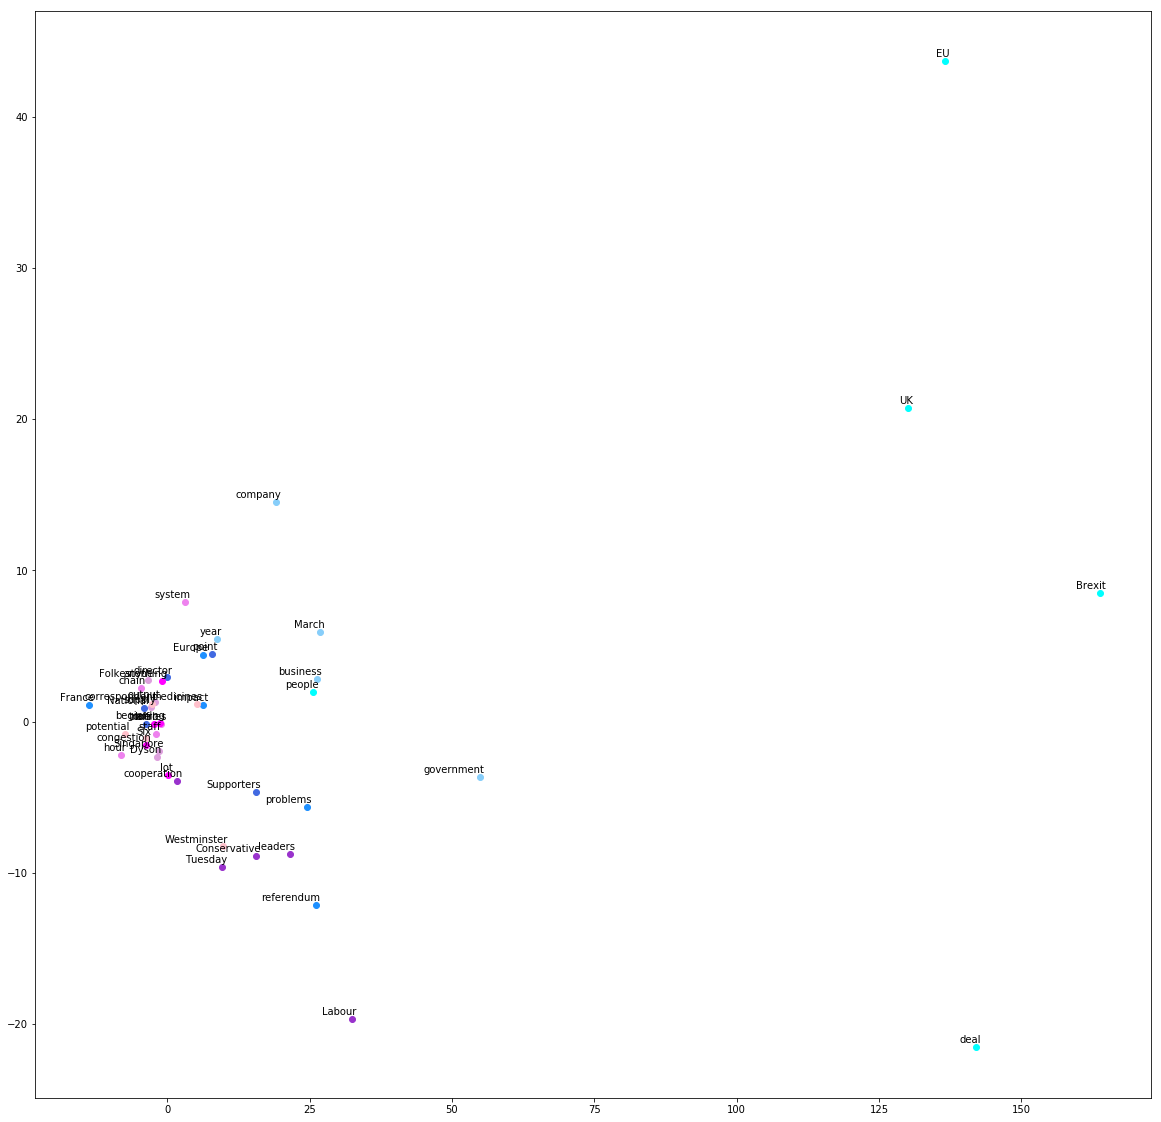

In [8]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 5

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(8)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(7)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(6)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(5)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(4)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(3)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(2)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(1)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()



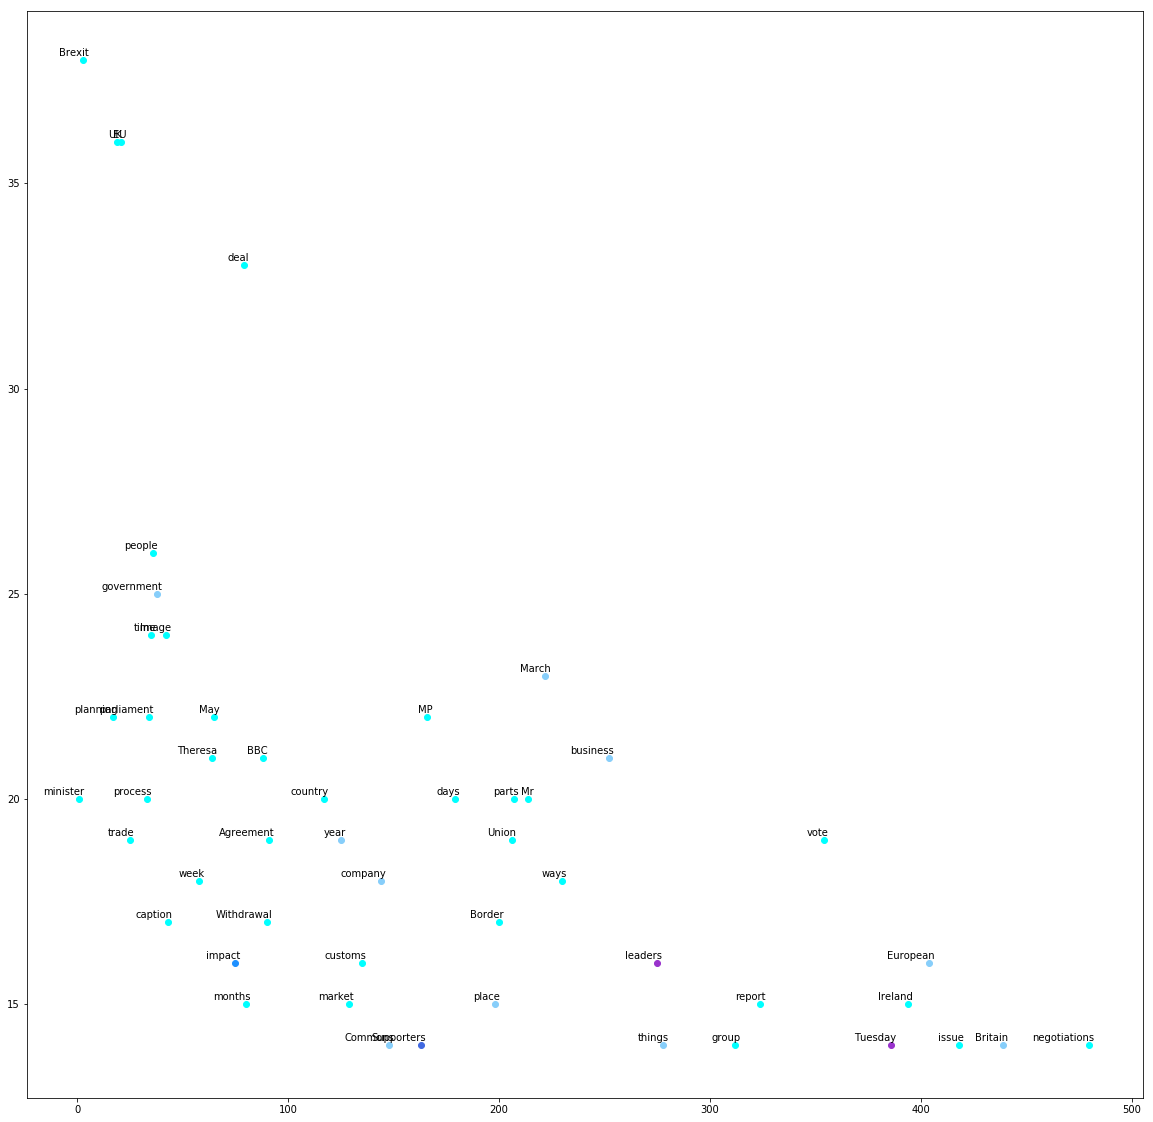

In [9]:
from packages.gc.linear import Linear
linearProcessor = Linear(dataProcessor)

# Display top 50 points (all topics)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

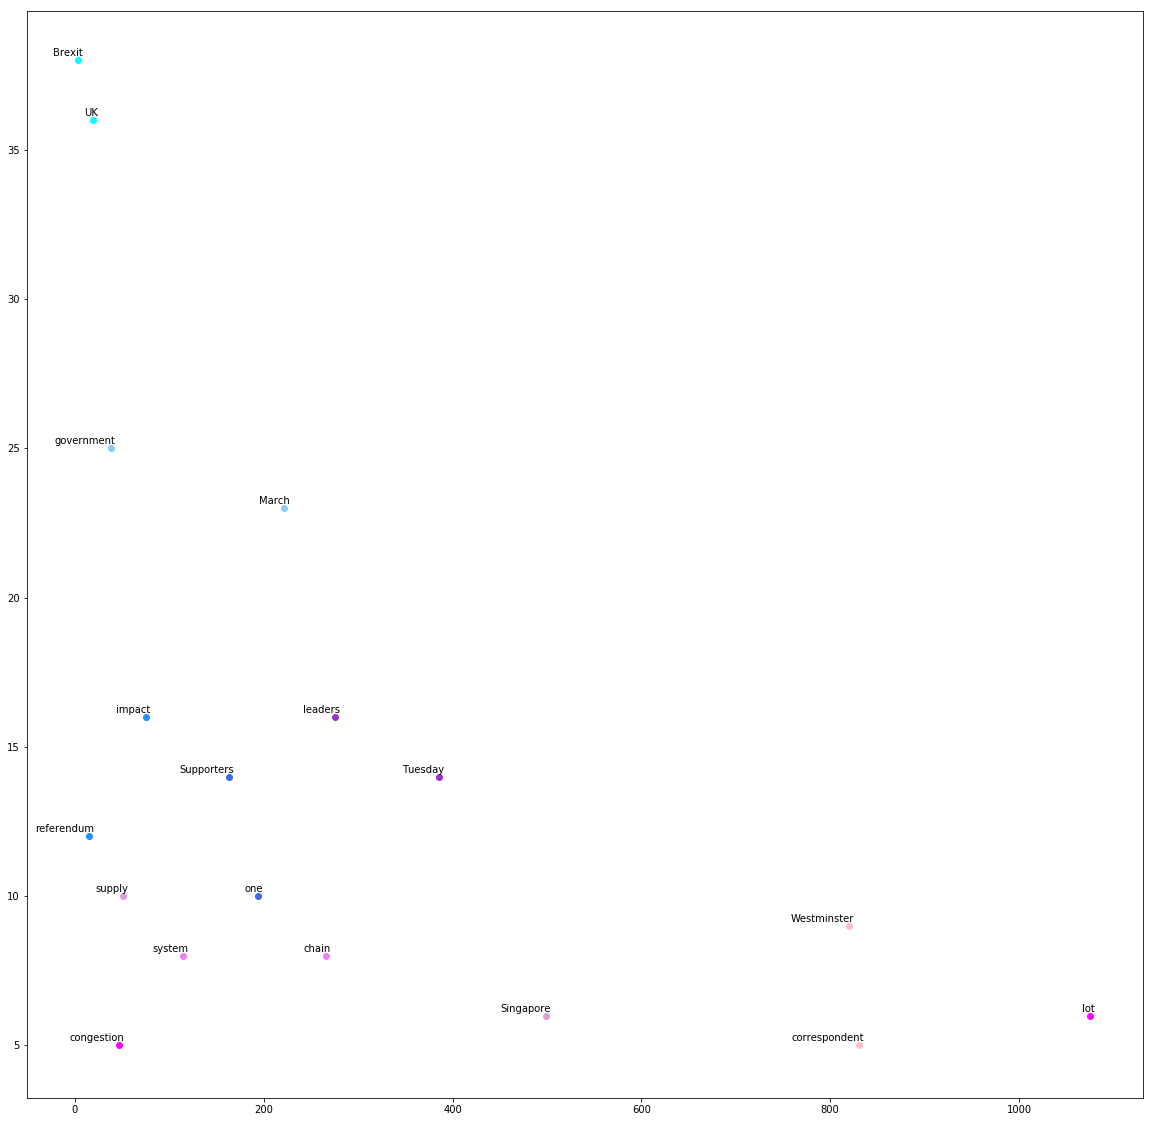

In [10]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 2

linearProcessor.setTopicFilter(9)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(8)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(7)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(6)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(5)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(4)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(3)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(2)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(1)
wordInfo += linearProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

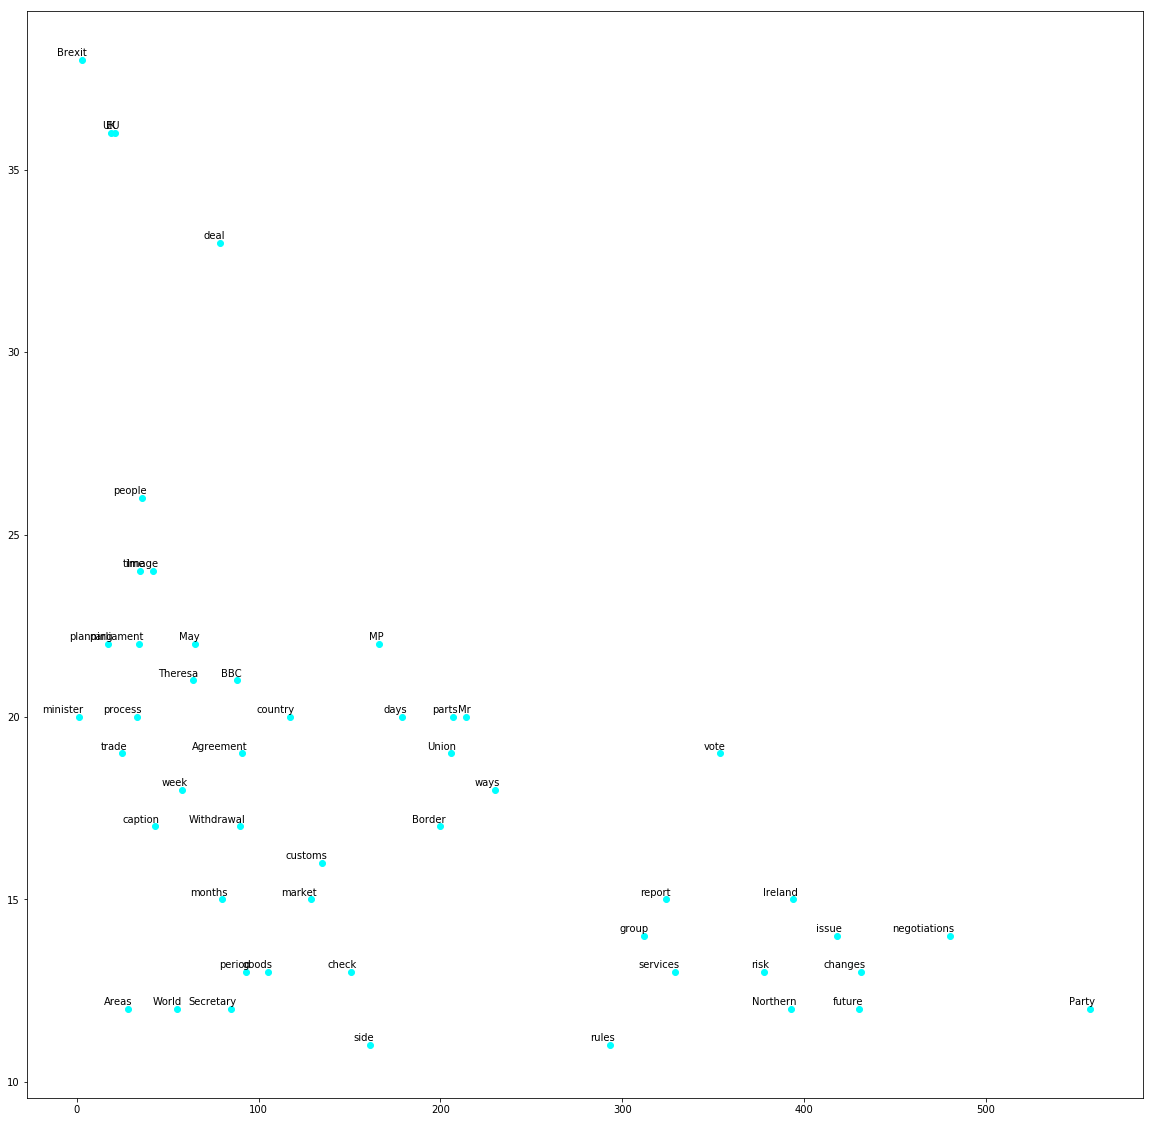

In [11]:
# Display top 50 points (top topic)
linearProcessor.setTopicFilter(9)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

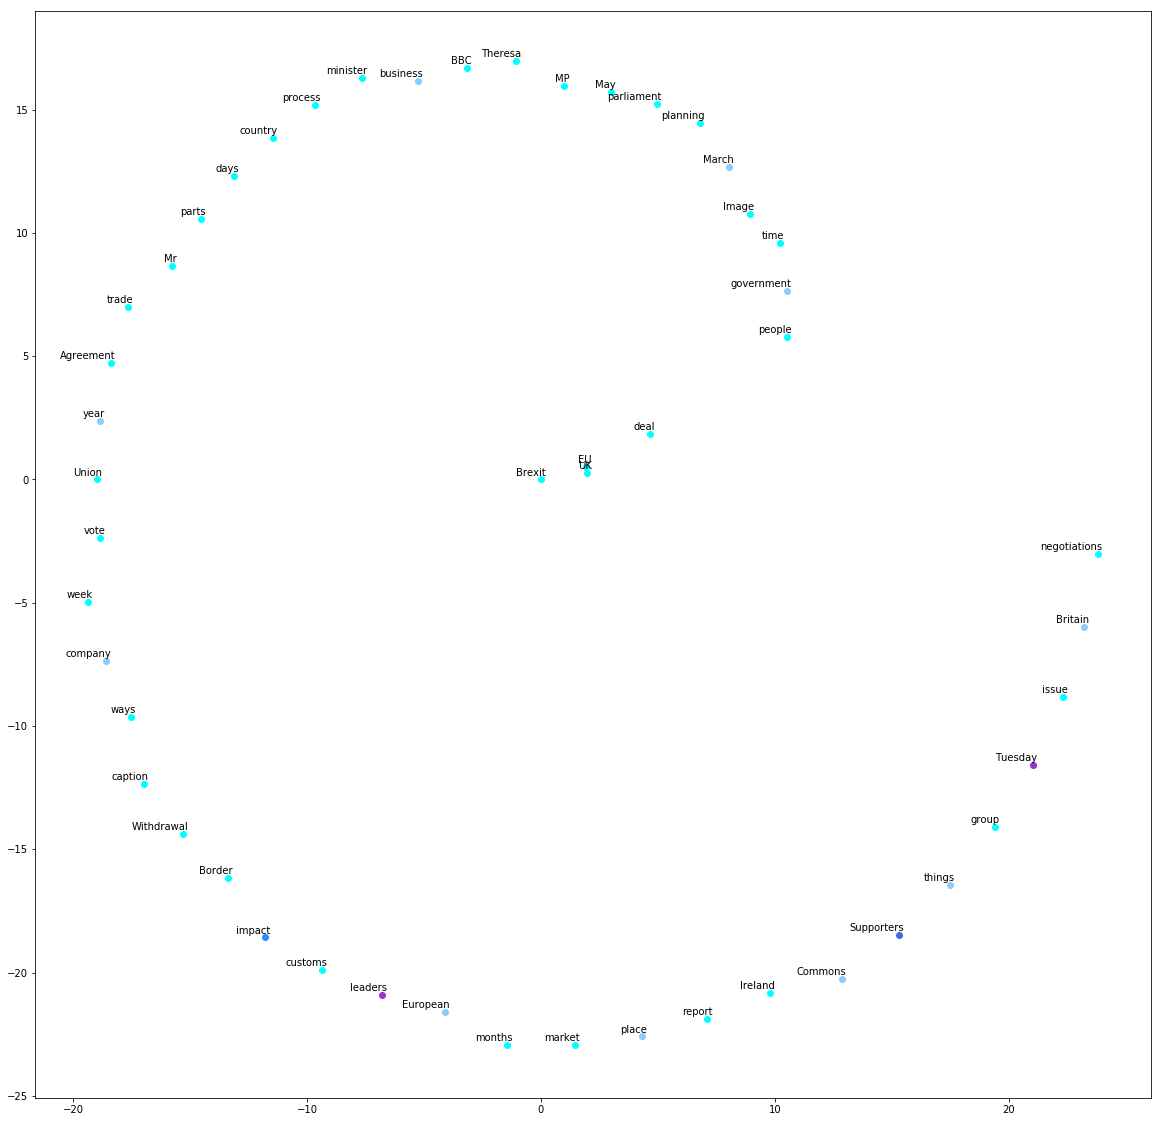

In [12]:

from packages.gc.peripheral import Peripheral
peripheralProcessor = Peripheral(dataProcessor)


# Display top 50 points (all topics)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()


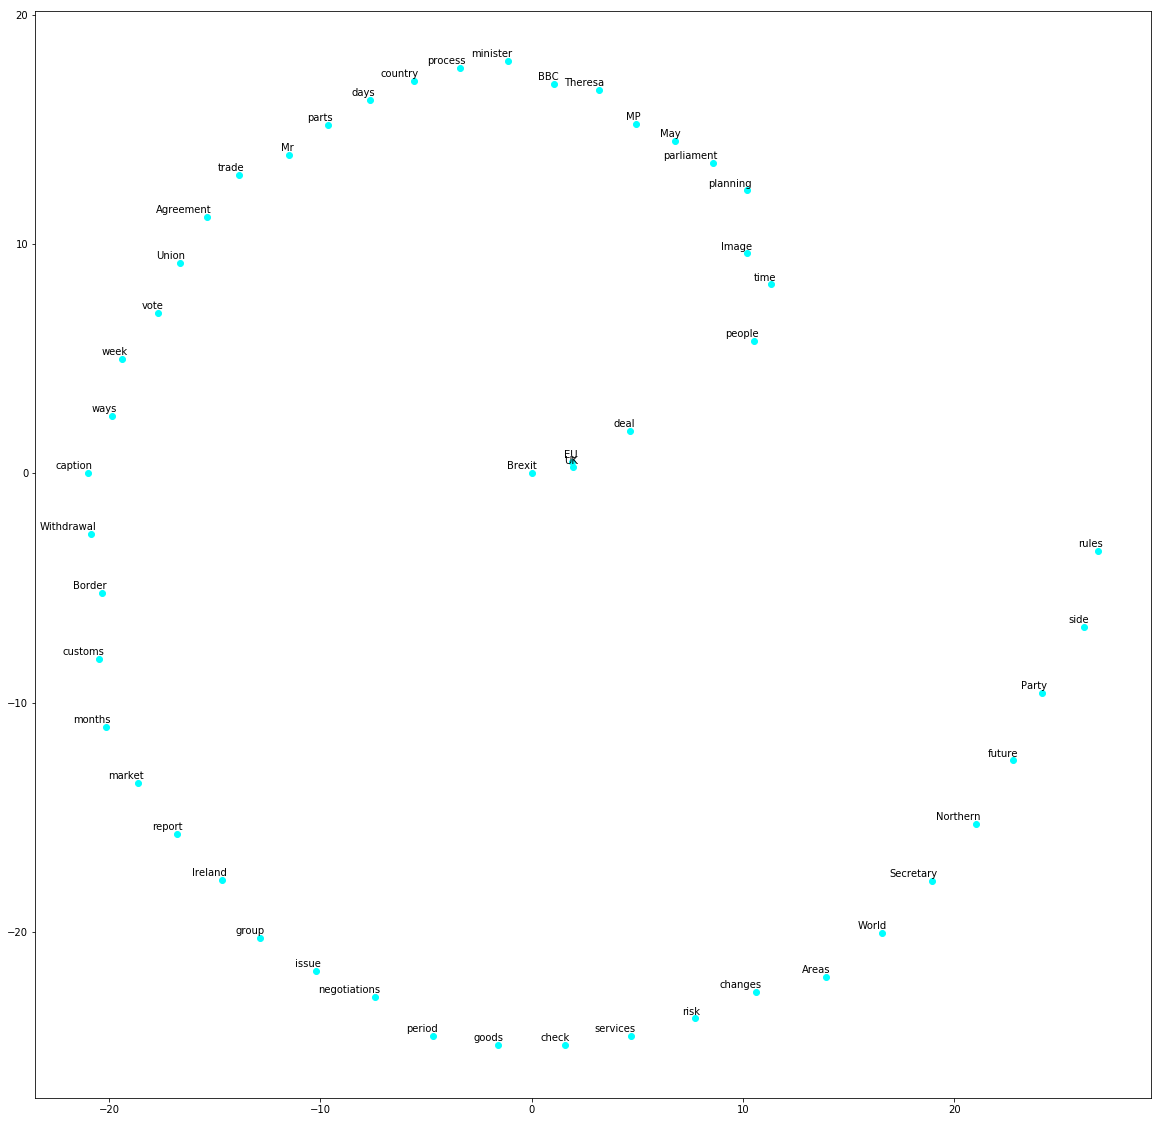

In [13]:
# Display top 50 points (top topic)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTopicFilter(9)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

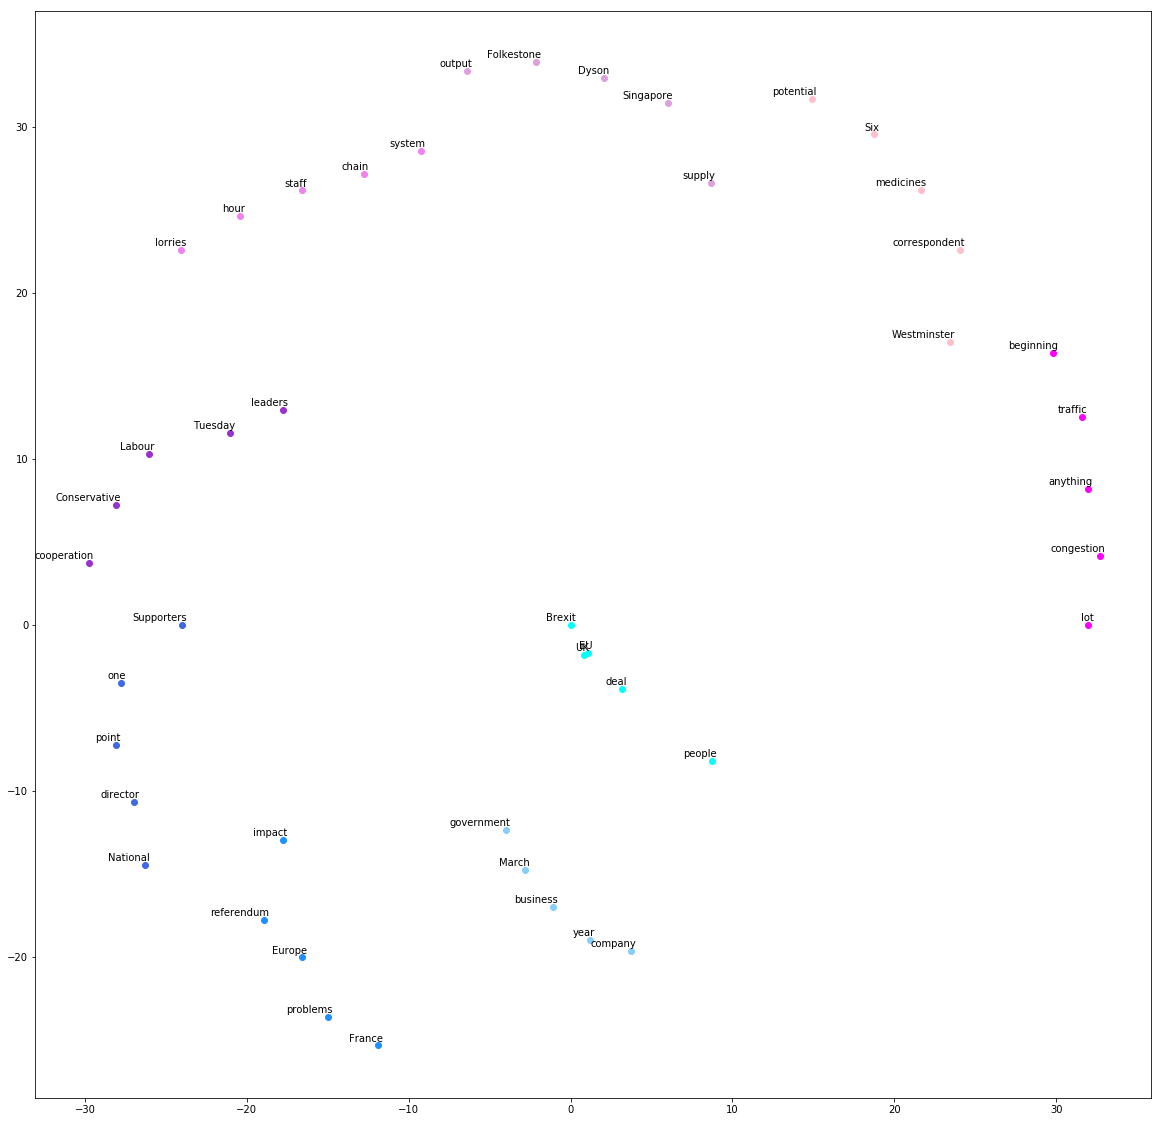

In [14]:

# All topics
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTotalAngle(360 / 10)

numberOfWords = 5
peripheralProcessor.setTopicFilter(1)
wordInfo = peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(2)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(3)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(4)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(5)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(6)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(7)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(8)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(9)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()



In [15]:
from packages.gc.word2vec import Word2Vec
word2vecProcessor = Word2Vec(dataProcessor)

if train:
    word2vecProcessor.setNumberOfIterations(500)
    word2vecProcessor.setPerplexity(10)
    word2vecProcessor.setNumberOfTopics(10)
    skipWindow = 2
    word2vecProcessor.resetIndex()
    word2vecProcessor.setSkipWindow(skipWindow)
    word2vecProcessor.setBatchSize(128)
    word2vecProcessor.train()



Batches:  14
--------------------------

Average loss after epoch  0 :  10.947790963309151

Average loss after epoch  0 :  13.207628989706235

Average loss after epoch  0 :  11.502227972269752

Average loss after epoch  0 :  11.48044914506168

Average loss after epoch  0 :  12.159738502688556

Average loss after epoch  0 :  10.844874379307553

Average loss after epoch  0 :  11.086462497517504

Average loss after epoch  0 :  9.885095221641876

Average loss after epoch  0 :  11.362624686590491

Average loss after epoch  0 :  11.546270066899321

Average loss after epoch  0 :  10.107038612479416

Average loss after epoch  0 :  9.127773701812146

Average loss after epoch  0 :  10.164308577752207

Average loss after epoch  0 :  8.79958520829508
Similar to extension: wont, workforce, Jim, drinking, Well,
Similar to deal: Jacob, question, preparations, clarification, birth,
Similar to Organisation: Europa, Commission, shortages, capacity, history,
Similar to minister: technology, Osborne, stra


Average loss after epoch  7 :  4.186786165601469

Average loss after epoch  7 :  5.62065529757784

Average loss after epoch  7 :  2.7919761282589084

Average loss after epoch  7 :  4.392953543027143

Average loss after epoch  7 :  3.9992655109904987

Average loss after epoch  7 :  3.830168712646782

Average loss after epoch  7 :  3.5980542719726776

Average loss after epoch  7 :  3.0998764961983833
Similar to extension: wont, workforce, Jim, Foster, Well,
Similar to deal: food, LeaveEU, Eldon, declarations, defeat,
Similar to Organisation: Europa, Commission, capacity, shortages, history,
Similar to minister: time, EU, year, technology, check,
Similar to advisor: Twitter, storage, demonstrators, problems, captionTheresa,
Similar to Image: investment, Mr, history, Periodico, clients,
Similar to politicians: right, tonnage, Gove, Posts, KrampKarrenbauer,
Similar to trade: declarations, people, UK, alert, Mr,
--------------------------

Average loss after epoch  8 :  3.2833529881068637




Average loss after epoch  14 :  1.5016402690820723

Average loss after epoch  14 :  1.4942005666183067

Average loss after epoch  14 :  2.0511182276414024

Average loss after epoch  14 :  1.6911183320908758

Average loss after epoch  14 :  1.0350790089328303

Average loss after epoch  14 :  1.5067625731652634

Average loss after epoch  14 :  2.001340530390013

Average loss after epoch  14 :  1.462828612190944

Average loss after epoch  14 :  2.8772015554466748

Average loss after epoch  14 :  2.195472206265862

Average loss after epoch  14 :  1.4067041849516073

Average loss after epoch  14 :  1.1013015506907746
Similar to extension: wont, workforce, Foster, Jim, Bastidon,
Similar to deal: Eldon, food, LeaveEU, declarations, defeat,
Similar to Organisation: Europa, Commission, capacity, shortages, St,
Similar to minister: time, year, EU, potential, check,
Similar to advisor: Twitter, demonstrators, problems, China, storage,
Similar to Image: investment, Mr, history, Periodico, supply,


Average loss after epoch  21 :  0.636298055203941

Average loss after epoch  21 :  0.5101031146412937

Average loss after epoch  21 :  0.756422171152531

Average loss after epoch  21 :  0.720053545716043

Average loss after epoch  21 :  0.43520463308284935

Average loss after epoch  21 :  0.6142480123614912

Average loss after epoch  21 :  0.8557253376967541

Average loss after epoch  21 :  0.5407616786752912

Average loss after epoch  21 :  0.7775766998003976

Average loss after epoch  21 :  0.5040927114193713

Average loss after epoch  21 :  0.7813212203277369

Average loss after epoch  21 :  0.6361558559912529
Similar to extension: wont, workforce, Foster, Bastidon, Jim,
Similar to deal: Eldon, preparations, food, LeaveEU, Jacob,
Similar to Organisation: Europa, Commission, capacity, shortages, St,
Similar to minister: year, time, EU, potential, check,
Similar to advisor: Twitter, demonstrators, problems, China, competitiveness,
Similar to Image: investment, Periodico, history, Mr,


Average loss after epoch  28 :  0.31160531838333017

Average loss after epoch  28 :  0.70464821259152

Average loss after epoch  28 :  0.46428967912989794

Average loss after epoch  28 :  0.36592183893635016

Average loss after epoch  28 :  0.4079100648460744

Average loss after epoch  28 :  0.34593856022399067

Average loss after epoch  28 :  0.5142051745636417

Average loss after epoch  28 :  0.3807647708568059

Average loss after epoch  28 :  0.3356051309017417

Average loss after epoch  28 :  0.7472597180598413
Similar to extension: wont, workforce, Foster, Bastidon, Theresa,
Similar to deal: Eldon, preparations, Jacob, food, declarations,
Similar to Organisation: Europa, Commission, capacity, shortages, St,
Similar to minister: year, time, potential, EU, check,
Similar to advisor: Twitter, demonstrators, problems, China, competitiveness,
Similar to Image: Periodico, investment, history, Folkestone, Mr,
Similar to politicians: right, Gove, Posts, Grayling, inspection,
Similar to t


Average loss after epoch  36 :  0.3569029917850643

Average loss after epoch  36 :  0.2525770263340824

Average loss after epoch  36 :  0.24416041087867785

Average loss after epoch  36 :  0.26962872893452783

Average loss after epoch  36 :  0.28818830177247534
Similar to extension: wont, workforce, Foster, Bastidon, Theresa,
Similar to deal: preparations, Eldon, Jacob, food, declarations,
Similar to Organisation: Europa, Commission, capacity, shortages, St,
Similar to minister: time, year, potential, EU, impasse,
Similar to advisor: Twitter, demonstrators, problems, China, competitiveness,
Similar to Image: Periodico, history, investment, Folkestone, supply,
Similar to politicians: right, Gove, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, people, event,
--------------------------

Average loss after epoch  37 :  0.280374424798148

Average loss after epoch  37 :  0.24623713444690315

Average loss after epoch  37 :  0.29262448034898186

Average loss after ep


Average loss after epoch  43 :  0.2623632975987026

Average loss after epoch  43 :  0.23310340180688977

Average loss after epoch  43 :  0.22275532195588937

Average loss after epoch  43 :  0.609239570377569

Average loss after epoch  43 :  0.24434484698079176

Average loss after epoch  43 :  0.2207445173445927

Average loss after epoch  43 :  0.18357065085132623

Average loss after epoch  43 :  0.20291991089324135

Average loss after epoch  43 :  0.19439989828959817

Average loss after epoch  43 :  0.17323787333276705

Average loss after epoch  43 :  0.21540003683006964

Average loss after epoch  43 :  0.19152391358914558

Average loss after epoch  43 :  0.2595576987413442

Average loss after epoch  43 :  0.19778438796420805
Similar to extension: wont, Foster, workforce, Bastidon, Theresa,
Similar to deal: preparations, Eldon, Jacob, food, declarations,
Similar to Organisation: Europa, Commission, capacity, shortages, St,
Similar to minister: time, year, potential, impasse, technolog


Average loss after epoch  49 :  0.21501287616773412

Average loss after epoch  49 :  0.18410540251326274
Similar to extension: Foster, wont, workforce, Bastidon, Theresa,
Similar to deal: preparations, Eldon, Jacob, food, declarations,
Similar to Organisation: Europa, Commission, capacity, shortages, St,
Similar to minister: time, year, potential, impasse, technology,
Similar to advisor: Twitter, demonstrators, problems, China, competitiveness,
Similar to Image: Periodico, history, investment, Folkestone, London,
Similar to politicians: right, Gove, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, people, catastrophe,
--------------------------

Average loss after epoch  50 :  0.27641979285648893

Average loss after epoch  50 :  0.19660681729414026

Average loss after epoch  50 :  0.21878332342767856

Average loss after epoch  50 :  0.21677238206498975

Average loss after epoch  50 :  0.1609206415786865

Average loss after epoch  50 :  0.24145315529033204

Aver


Average loss after epoch  56 :  0.14974066346688428

Average loss after epoch  56 :  0.15886628395730779
Similar to extension: Foster, wont, workforce, Bastidon, Theresa,
Similar to deal: preparations, Eldon, Jacob, food, declarations,
Similar to Organisation: Europa, Commission, capacity, shortages, St,
Similar to minister: time, year, potential, impasse, technology,
Similar to advisor: Twitter, problems, demonstrators, China, competitiveness,
Similar to Image: Periodico, history, Folkestone, investment, London,
Similar to politicians: right, Gove, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, people, catastrophe,
--------------------------

Average loss after epoch  57 :  0.2413656030382429

Average loss after epoch  57 :  0.1959343418783071

Average loss after epoch  57 :  0.1849429981006478

Average loss after epoch  57 :  0.23343440731432677

Average loss after epoch  57 :  0.1558239096971258

Average loss after epoch  57 :  0.15572716249292737

Average

Similar to trade: declarations, diesel, alert, people, catastrophe,
--------------------------

Average loss after epoch  63 :  0.22787904739379883

Average loss after epoch  63 :  0.20315417221614293

Average loss after epoch  63 :  0.17300352636648683

Average loss after epoch  63 :  0.1501729894136201

Average loss after epoch  63 :  0.16152918628606633

Average loss after epoch  63 :  0.15002085502073412

Average loss after epoch  63 :  0.22091959327113433

Average loss after epoch  63 :  0.19103159110436255

Average loss after epoch  63 :  0.14869445675944246

Average loss after epoch  63 :  0.1391228906557212

Average loss after epoch  63 :  0.16148977103861492

Average loss after epoch  63 :  0.18010182368119013

Average loss after epoch  63 :  0.15345741679793273

Average loss after epoch  63 :  0.12253863568144588
Similar to extension: Foster, wont, workforce, Bastidon, Theresa,
Similar to deal: preparations, Eldon, Jacob, food, declarations,
Similar to Organisation: Europa, C

Similar to advisor: Twitter, problems, demonstrators, China, competitiveness,
Similar to Image: Periodico, history, Folkestone, investment, London,
Similar to politicians: right, Gove, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, people, catastrophe,
--------------------------

Average loss after epoch  70 :  0.2172966514314924

Average loss after epoch  70 :  0.16097811655122407

Average loss after epoch  70 :  0.1789768279988981

Average loss after epoch  70 :  0.1749741218019058

Average loss after epoch  70 :  0.19292272259457147

Average loss after epoch  70 :  0.1529592879681809

Average loss after epoch  70 :  0.1455215940026231

Average loss after epoch  70 :  0.15374639721958258

Average loss after epoch  70 :  0.1470608051988684

Average loss after epoch  70 :  0.15271894801495473

Average loss after epoch  70 :  0.16625567324731888

Average loss after epoch  70 :  0.14104011800159594

Average loss after epoch  70 :  0.15429221104033616

Average lo


Average loss after epoch  77 :  0.16865513623629644

Average loss after epoch  77 :  0.17146040563134538

Average loss after epoch  77 :  0.13475641293493637

Average loss after epoch  77 :  0.14394966809747314

Average loss after epoch  77 :  0.1392653272611738

Average loss after epoch  77 :  0.17299034117277776

Average loss after epoch  77 :  0.1273255191520682

Average loss after epoch  77 :  0.12743079550405223

Average loss after epoch  77 :  0.12775546304338029

Average loss after epoch  77 :  0.13280709725898848

Average loss after epoch  77 :  0.1315668368213818

Average loss after epoch  77 :  0.13929606863340768
Similar to extension: Foster, wont, workforce, Bastidon, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, declarations,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, technology,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Perio


Average loss after epoch  84 :  0.22553934369768416

Average loss after epoch  84 :  0.16652174628510766

Average loss after epoch  84 :  0.1509730190299343

Average loss after epoch  84 :  0.14585236545306152

Average loss after epoch  84 :  0.11245912585648873

Average loss after epoch  84 :  0.14041184972722826

Average loss after epoch  84 :  0.13331898592128605

Average loss after epoch  84 :  0.13870788226682107

Average loss after epoch  84 :  0.1254671986686035

Average loss after epoch  84 :  0.12494287445280414

Average loss after epoch  84 :  0.14208419660310906

Average loss after epoch  84 :  0.14925531513604448

Average loss after epoch  84 :  0.15881964420074007

Average loss after epoch  84 :  0.14155954750861
Similar to extension: Foster, wont, workforce, Bastidon, Well,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, technology,
Similar 


Average loss after epoch  90 :  0.12384154832814485

Average loss after epoch  90 :  0.12418399711198348

Average loss after epoch  90 :  0.12949171127290013
Similar to extension: Foster, wont, Bastidon, workforce, Well,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, technology,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, investment, London,
Similar to politicians: right, Gove, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, catastrophe, people,
--------------------------

Average loss after epoch  91 :  0.20626865114484513

Average loss after epoch  91 :  0.1630975762192084

Average loss after epoch  91 :  0.15910621738989916

Average loss after epoch  91 :  0.15660023423643324

Average loss after epoch  91 :  0.1292204854975225

Average loss aft


Average loss after epoch  97 :  0.15169967550230443

Average loss after epoch  97 :  0.10969414976252857

Average loss after epoch  97 :  0.14218091302472477

Average loss after epoch  97 :  0.17428670563396823

Average loss after epoch  97 :  0.14317038956007574

Average loss after epoch  97 :  0.10862406896886458

Average loss after epoch  97 :  0.12756783395107107

Average loss after epoch  97 :  0.12827304050262167

Average loss after epoch  97 :  0.12638118653420566

Average loss after epoch  97 :  0.1460628359012121

Average loss after epoch  97 :  0.15389203917761865
Similar to extension: Foster, Bastidon, wont, workforce, Well,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, investment, London,
Similar to po


Average loss after epoch  104 :  0.10032345639190375
Similar to extension: Foster, Bastidon, wont, workforce, Well,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, investment, London,
Similar to politicians: right, Gove, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, catastrophe, people,
--------------------------

Average loss after epoch  105 :  0.20734807423182897

Average loss after epoch  105 :  0.1690628163668574

Average loss after epoch  105 :  0.15998780466724763

Average loss after epoch  105 :  0.1593526344481035

Average loss after epoch  105 :  0.10916164759357007

Average loss after epoch  105 :  0.1409444917125072

Average loss after epoch  105 :  0.18593801848152255

Average


Average loss after epoch  112 :  0.2018612793513707

Average loss after epoch  112 :  0.16872977480596424

Average loss after epoch  112 :  0.14335166504362234

Average loss after epoch  112 :  0.1612288349372851

Average loss after epoch  112 :  0.10116902840636108

Average loss after epoch  112 :  0.11247739894936619

Average loss after epoch  112 :  0.12372192151755813

Average loss after epoch  112 :  0.13682481817362616

Average loss after epoch  112 :  0.12108317242630742

Average loss after epoch  112 :  0.1026790079804889

Average loss after epoch  112 :  0.12520796867589604

Average loss after epoch  112 :  0.1218278882137228

Average loss after epoch  112 :  0.11117732012010251

Average loss after epoch  112 :  0.10036096365944022
Similar to extension: Foster, Bastidon, wont, Well, workforce,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, tempe


Average loss after epoch  119 :  0.11581944176996536

Average loss after epoch  119 :  0.11549747752961999

Average loss after epoch  119 :  0.11431669391891608

Average loss after epoch  119 :  0.1162726107081496
Similar to extension: Foster, Bastidon, wont, Well, workforce,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, investment, London,
Similar to politicians: Gove, right, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, catastrophe, people,
--------------------------

Average loss after epoch  120 :  0.2071223599570138

Average loss after epoch  120 :  0.1679308438787655

Average loss after epoch  120 :  0.14054545351784709

Average loss after epoch  120 :  0.13900840891892094

Average


Average loss after epoch  126 :  0.19832074642181396

Average loss after epoch  126 :  0.18555344002587454

Average loss after epoch  126 :  0.16268719154961256

Average loss after epoch  126 :  0.16479409657657668

Average loss after epoch  126 :  0.10892066850743161

Average loss after epoch  126 :  0.10174075016981184

Average loss after epoch  126 :  0.11915584352016861

Average loss after epoch  126 :  0.12531646372761074

Average loss after epoch  126 :  0.13275615394249257

Average loss after epoch  126 :  0.12191901321931588

Average loss after epoch  126 :  0.11795115308798773

Average loss after epoch  126 :  0.12935059399607454

Average loss after epoch  126 :  0.12386888629709161

Average loss after epoch  126 :  0.12252030654075208
Similar to extension: Foster, Bastidon, Well, wont, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, tem


Average loss after epoch  135 :  0.11310208722731684

Average loss after epoch  135 :  0.144543563244443

Average loss after epoch  135 :  0.11957627782635041

Average loss after epoch  135 :  0.11041071177196797

Average loss after epoch  135 :  0.11962761351088136

Average loss after epoch  135 :  0.13651096101929705

Average loss after epoch  135 :  0.1348075010069282

Average loss after epoch  135 :  0.135736314581179

Average loss after epoch  135 :  0.09851965507768047
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe


Average loss after epoch  144 :  0.1540099844640615

Average loss after epoch  144 :  0.17310331027639853

Average loss after epoch  144 :  0.14197528203394652

Average loss after epoch  144 :  0.10554258301149284

Average loss after epoch  144 :  0.13062692843327245

Average loss after epoch  144 :  0.11632268851885434

Average loss after epoch  144 :  0.14635812755559827

Average loss after epoch  144 :  0.12674140044346802

Average loss after epoch  144 :  0.1156885958202505

Average loss after epoch  144 :  0.1109268604040701

Average loss after epoch  144 :  0.11487555460078772

Average loss after epoch  144 :  0.12403363837794411

Average loss after epoch  144 :  0.13115283907452932
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demo

Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  151 :  0.19814530440739223

Average loss after epoch  151 :  0.15642410760023157

Average loss after epoch  151 :  0.16023750407702722

Average loss after epoch  151 :  0.1651782274978551

Average loss after epoch  151 :  0.09302746739229413

Average loss after epoch  151 :  0.1128178746120141

Average loss after epoch  151 :  0.13560702907624703

Average loss after epoch  151 :  0.12317878185821633

Average loss after epoch  151 :  0.10974047452148446

Average loss after epoch 

Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  158 :  0.1917752708707537

Average loss after epoch  158 :  0.15154303458272195

Average loss after epoch  158 :  0.153871119978129

Average loss after epoch  158 :  0.13174306927423388

Average loss after epoch  158 :  0.09360607151353693

Average loss after epoch  158 :  0.0971556275261047

Average loss after epoch  158 :  0.11958057943676627

Average loss after epoch  158 :  0.13152688405605634

Average loss afte


Average loss after epoch  164 :  0.08964051968493324

Average loss after epoch  164 :  0.0990525925206558

Average loss after epoch  164 :  0.08942495388677728

Average loss after epoch  164 :  0.09574877265158935
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, Affairs,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  165 :  0.20077458449772426

Average loss after epoch  165 :  0.15044561697512257

Average loss after epoch  165 :  0.13736836660012558

Average loss after epoch  165 :  0.12628408311953498

Average loss 


Average loss after epoch  171 :  0.09805952356951374

Average loss after epoch  171 :  0.10611001852488015

Average loss after epoch  171 :  0.11773510788404906

Average loss after epoch  171 :  0.12336403700178858

Average loss after epoch  171 :  0.09611230703511833
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  172 :  0.19815400668552943

Average loss after epoch  172 :  0.15782605142009504

Average loss after epoch  172 :  0.14781981602354577

Average loss 


Average loss after epoch  178 :  0.12185349989416795

Average loss after epoch  178 :  0.11872594904933842

Average loss after epoch  178 :  0.12299935686590734
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  179 :  0.19287363120487758

Average loss after epoch  179 :  0.1437610326981058

Average loss after epoch  179 :  0.14072006045903132

Average loss after epoch  179 :  0.1641414116529662

Average loss after epoch  179 :  0.15587612525840627

Average loss af


Average loss after epoch  185 :  0.11220739326864433

Average loss after epoch  185 :  0.11091414380782413

Average loss after epoch  185 :  0.09643753319177852
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  186 :  0.2128382750919887

Average loss after epoch  186 :  0.14217468548794182

Average loss after epoch  186 :  0.14002653278692817

Average loss after epoch  186 :  0.16412147192570728

Average loss after epoch  186 :  0.09147517759772508

Average loss a


Average loss after epoch  192 :  0.09966294573906997

Average loss after epoch  192 :  0.09153190156332365
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  193 :  0.20519317899431502

Average loss after epoch  193 :  0.15768881476655297

Average loss after epoch  193 :  0.1274066282430821

Average loss after epoch  193 :  0.1213968844152599

Average loss after epoch  193 :  0.10562979217751474

Average loss after epoch  193 :  0.10083621671964983

Average loss af


Average loss after epoch  200 :  0.15652662073135973

Average loss after epoch  200 :  0.08767860670498483

Average loss after epoch  200 :  0.12311953699277375

Average loss after epoch  200 :  0.11724704106342689

Average loss after epoch  200 :  0.14042142856666864

Average loss after epoch  200 :  0.10732813664032549

Average loss after epoch  200 :  0.10162537153828254

Average loss after epoch  200 :  0.08897922213323635

Average loss after epoch  200 :  0.10158869040540834

Average loss after epoch  200 :  0.12100979005476689

Average loss after epoch  200 :  0.1010483306895983
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to


Average loss after epoch  207 :  0.1160048977007806

Average loss after epoch  207 :  0.12689760423466095

Average loss after epoch  207 :  0.1395935523345105

Average loss after epoch  207 :  0.12157685918349617

Average loss after epoch  207 :  0.1142486300942008

Average loss after epoch  207 :  0.10062266224109491

Average loss after epoch  207 :  0.09377539217009669

Average loss after epoch  207 :  0.12183741165025926

Average loss after epoch  207 :  0.11035028769347206
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: right, Gove, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe


Average loss after epoch  214 :  0.12590343470699536

Average loss after epoch  214 :  0.0956085627386449

Average loss after epoch  214 :  0.10820035214303135

Average loss after epoch  214 :  0.12405026248173925

Average loss after epoch  214 :  0.14972709778595328

Average loss after epoch  214 :  0.10584353489794075

Average loss after epoch  214 :  0.12339594469405195

Average loss after epoch  214 :  0.09967923342183728

Average loss after epoch  214 :  0.10569311052489529

Average loss after epoch  214 :  0.11812947539341467

Average loss after epoch  214 :  0.09794764742102793
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to


Average loss after epoch  221 :  0.09641677458557676

Average loss after epoch  221 :  0.11060305601037201

Average loss after epoch  221 :  0.09636447838777351
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  222 :  0.2249729803630284

Average loss after epoch  222 :  0.16774162346003005

Average loss after epoch  222 :  0.13193567075465232

Average loss after epoch  222 :  0.13846851777330332

Average loss after epoch  222 :  0.08733992164425573

Average loss aft


Average loss after epoch  228 :  0.12470209662973385

Average loss after epoch  228 :  0.11237300298388479
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  229 :  0.196958133152553

Average loss after epoch  229 :  0.1500212002773674

Average loss after epoch  229 :  0.12110258034992495

Average loss after epoch  229 :  0.13972739725746447

Average loss after epoch  229 :  0.10619678124745525

Average loss after epoch  229 :  0.12367804705029431

Average loss after


Average loss after epoch  236 :  0.10453416094782886

Average loss after epoch  236 :  0.1309873384986626

Average loss after epoch  236 :  0.12369818717776528

Average loss after epoch  236 :  0.113810016449391

Average loss after epoch  236 :  0.10475934926499207

Average loss after epoch  236 :  0.1100351394527223

Average loss after epoch  236 :  0.1265949577186297

Average loss after epoch  236 :  0.09914176357710495

Average loss after epoch  236 :  0.08745662988149279
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, 


Average loss after epoch  243 :  0.15142595108989804

Average loss after epoch  243 :  0.11588603211062574

Average loss after epoch  243 :  0.11313443946882189

Average loss after epoch  243 :  0.10182537746432573

Average loss after epoch  243 :  0.11642554126467246

Average loss after epoch  243 :  0.10954319772428411

Average loss after epoch  243 :  0.1177738644802188

Average loss after epoch  243 :  0.08606255720146792
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss aft


Average loss after epoch  250 :  0.12454101270702167

Average loss after epoch  250 :  0.13698804153308036

Average loss after epoch  250 :  0.10247811233238434

Average loss after epoch  250 :  0.1168101746093915

Average loss after epoch  250 :  0.10065374004167947

Average loss after epoch  250 :  0.09302185917704064

Average loss after epoch  250 :  0.12108290120590923
Similar to extension: Foster, Bastidon, Well, enemies, Theresa,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  251 :  0.20357418060302734

Average loss a


Average loss after epoch  257 :  0.10811358549345561

Average loss after epoch  257 :  0.1271370520606985

Average loss after epoch  257 :  0.14034673053888586

Average loss after epoch  257 :  0.12127918606632389

Average loss after epoch  257 :  0.11145983892227455

Average loss after epoch  257 :  0.11339469378728614

Average loss after epoch  257 :  0.10839311255269032

Average loss after epoch  257 :  0.1091890959322827

Average loss after epoch  257 :  0.09440884014240601
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastroph


Average loss after epoch  264 :  0.10569554004676908

Average loss after epoch  264 :  0.1238740380559704

Average loss after epoch  264 :  0.10616742497366341
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  265 :  0.19962171145847865

Average loss after epoch  265 :  0.16426076451126412

Average loss after epoch  265 :  0.12482349500711735

Average loss after epoch  265 :  0.12716274064612956

Average loss after epoch  265 :  0.1174144266629734

Average loss


Average loss after epoch  272 :  0.19269698006766184

Average loss after epoch  272 :  0.15961830470026755

Average loss after epoch  272 :  0.12344159728931615

Average loss after epoch  272 :  0.13107164562220178

Average loss after epoch  272 :  0.08325161810465853

Average loss after epoch  272 :  0.10757280409034391

Average loss after epoch  272 :  0.10831877235833824

Average loss after epoch  272 :  0.11316011395075777

Average loss after epoch  272 :  0.11950177667113916

Average loss after epoch  272 :  0.09972559179406279

Average loss after epoch  272 :  0.10997767871727611

Average loss after epoch  272 :  0.09359958883276302

Average loss after epoch  272 :  0.10369798336437111

Average loss after epoch  272 :  0.08596968423327575
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, potential, year, impass


Average loss after epoch  278 :  0.1314810716548113

Average loss after epoch  278 :  0.1014136856754518

Average loss after epoch  278 :  0.08545117425038627

Average loss after epoch  278 :  0.07659870730064754

Average loss after epoch  278 :  0.09502880512690434

Average loss after epoch  278 :  0.12310615092446116

Average loss after epoch  278 :  0.11642104593765856
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  279 :  0.21745967864990234

Average loss

Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, year, potential, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  287 :  0.21012817110334123

Average loss after epoch  287 :  0.1578438354998219

Average loss after epoch  287 :  0.13061746581302788

Average loss after epoch  287 :  0.1225764472029796

Average loss after epoch  287 :  0.08837962802493991

Average loss after epoch  287 :  0.10055361521829055

Average loss after epoch  287 :  0.10568914124837156

Average loss after epoch  287 :  0.09257000493823818

Average loss


Average loss after epoch  295 :  0.12805743839745357

Average loss after epoch  295 :  0.12372243108238822

Average loss after epoch  295 :  0.10511336135146591

Average loss after epoch  295 :  0.1364759528972404

Average loss after epoch  295 :  0.13220231252296835

Average loss after epoch  295 :  0.10600450529753032

Average loss after epoch  295 :  0.11498320308050858

Average loss after epoch  295 :  0.0981456979447329
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss


Average loss after epoch  303 :  0.0807854705347484

Average loss after epoch  303 :  0.11884852515298601

Average loss after epoch  303 :  0.12632185807301777

Average loss after epoch  303 :  0.13139154697491598

Average loss after epoch  303 :  0.10421426110681599

Average loss after epoch  303 :  0.11658772046595578

Average loss after epoch  303 :  0.10365110367198059

Average loss after epoch  303 :  0.10402870584787305

Average loss after epoch  303 :  0.10954967595939223

Average loss after epoch  303 :  0.10089803838857893
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, value


Average loss after epoch  310 :  0.11353197211423856

Average loss after epoch  310 :  0.0884715847418417

Average loss after epoch  310 :  0.08069940501909675
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, food, dice,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, time, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: declarations, diesel, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  311 :  0.18855794838496617

Average loss after epoch  311 :  0.1360316167072374

Average loss after epoch  311 :  0.13343674717769677

Average loss after epoch  311 :  0.14147360465244568

Average loss after epoch  311 :  0.14177304175731406

Average loss


Average loss after epoch  317 :  0.19799092837742396

Average loss after epoch  317 :  0.16237238718538868

Average loss after epoch  317 :  0.13419241825276143

Average loss after epoch  317 :  0.1346563236483034

Average loss after epoch  317 :  0.09714858117960816

Average loss after epoch  317 :  0.09147980694491446

Average loss after epoch  317 :  0.12652043138552194

Average loss after epoch  317 :  0.1158520434829511

Average loss after epoch  317 :  0.08628587534408426

Average loss after epoch  317 :  0.08668060289279382

Average loss after epoch  317 :  0.08334545236716366

Average loss after epoch  317 :  0.09249343470582629

Average loss after epoch  317 :  0.10639182300500165

Average loss after epoch  317 :  0.08761734023770554
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse,


Average loss after epoch  324 :  0.09691194117706758

Average loss after epoch  324 :  0.1169627333117679

Average loss after epoch  324 :  0.13315511192901613

Average loss after epoch  324 :  0.10119565927274432

Average loss after epoch  324 :  0.12624245641010673

Average loss after epoch  324 :  0.09352524348481615

Average loss after epoch  324 :  0.1349869081437475

Average loss after epoch  324 :  0.10570316874597674
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, time, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss


Average loss after epoch  331 :  0.20054517473493302

Average loss after epoch  331 :  0.1589455336940532

Average loss after epoch  331 :  0.13904143040103747

Average loss after epoch  331 :  0.15072022212738298

Average loss after epoch  331 :  0.12559617298926234

Average loss after epoch  331 :  0.11120366251048965

Average loss after epoch  331 :  0.12377498773987629

Average loss after epoch  331 :  0.10070095617732515

Average loss after epoch  331 :  0.10550635922463246

Average loss after epoch  331 :  0.09101134955067826

Average loss after epoch  331 :  0.12006993408655794

Average loss after epoch  331 :  0.10168500976594833

Average loss after epoch  331 :  0.10859218398505203

Average loss after epoch  331 :  0.09305966124632085
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, time, year, impasse


Average loss after epoch  338 :  0.12171365868072122

Average loss after epoch  338 :  0.09683614263294738

Average loss after epoch  338 :  0.09805282899975677

Average loss after epoch  338 :  0.11247609977866915

Average loss after epoch  338 :  0.10402195717958163

Average loss after epoch  338 :  0.11653233785435384

Average loss after epoch  338 :  0.09712755766582264

Average loss after epoch  338 :  0.1159365944117817

Average loss after epoch  338 :  0.11691839902209747

Average loss after epoch  338 :  0.1161069922565048

Average loss after epoch  338 :  0.10828757323621728
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Simila

Average loss after epoch  345 :  0.08562330847644463

Average loss after epoch  345 :  0.10860668225349675

Average loss after epoch  345 :  0.10246800425738216
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, problems, demonstrators, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  346 :  0.19837251731327601

Average loss after epoch  346 :  0.1480772860196172

Average loss after epoch  346 :  0.12191874900990254

Average loss after epoch  346 :  0.14017778288717322

Average loss after epoch  346 :  0.10950262606952535

Average loss


Average loss after epoch  353 :  0.15248512735172196

Average loss after epoch  353 :  0.12460037605407982

Average loss after epoch  353 :  0.12902512474886232

Average loss after epoch  353 :  0.09173334661270298

Average loss after epoch  353 :  0.10331331053173622

Average loss after epoch  353 :  0.10290878894697775

Average loss after epoch  353 :  0.12207229214251833

Average loss after epoch  353 :  0.12651665386510805

Average loss after epoch  353 :  0.12932935454799513

Average loss after epoch  353 :  0.09145489129165367

Average loss after epoch  353 :  0.11170421526030384

Average loss after epoch  353 :  0.10547923082765773

Average loss after epoch  353 :  0.1070532706767724
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, demonstra


Average loss after epoch  360 :  0.14762969080456492

Average loss after epoch  360 :  0.11536573176146149

Average loss after epoch  360 :  0.11025928514667963

Average loss after epoch  360 :  0.10837801798288924

Average loss after epoch  360 :  0.13442850716348553

Average loss after epoch  360 :  0.10713254597033495

Average loss after epoch  360 :  0.08654526244050366

Average loss after epoch  360 :  0.12451925687168759

Average loss after epoch  360 :  0.09804005481811841

Average loss after epoch  360 :  0.1213395986230689

Average loss after epoch  360 :  0.09694250419928573
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Simil


Average loss after epoch  367 :  0.12019330122376694

Average loss after epoch  367 :  0.13897473035703473

Average loss after epoch  367 :  0.12688603175427968

Average loss after epoch  367 :  0.10524233052613229

Average loss after epoch  367 :  0.12605993795216217

Average loss after epoch  367 :  0.10948984456049553

Average loss after epoch  367 :  0.1028273649385906

Average loss after epoch  367 :  0.12413430602331486

Average loss after epoch  367 :  0.09923176282288029
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, cata


Average loss after epoch  374 :  0.10724418913351907

Average loss after epoch  374 :  0.09552740593398427

Average loss after epoch  374 :  0.10070655994446846

Average loss after epoch  374 :  0.08902060861589779

Average loss after epoch  374 :  0.09360567152159716

Average loss after epoch  374 :  0.10461257427906515

Average loss after epoch  374 :  0.08277261152861766
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  375 :  0.1957608801977975

Average los


Average loss after epoch  381 :  0.12359247542564702

Average loss after epoch  381 :  0.11097070854131993

Average loss after epoch  381 :  0.10220226878298508

Average loss after epoch  381 :  0.08816657551298056

Average loss after epoch  381 :  0.10012982437168524

Average loss after epoch  381 :  0.11474559005467308

Average loss after epoch  381 :  0.11365008162342949
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  382 :  0.19556253296988352

Average lo


Average loss after epoch  388 :  0.09496794817669287

Average loss after epoch  388 :  0.09900554495043919

Average loss after epoch  388 :  0.08609531356961057
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  389 :  0.19311925343104772

Average loss after epoch  389 :  0.16075466117080375

Average loss after epoch  389 :  0.12454976215306941

Average loss after epoch  389 :  0.12374029952454

Average loss after epoch  389 :  0.09093969946685819

Average loss 


Average loss after epoch  395 :  0.10973074434418591

Average loss after epoch  395 :  0.11577587638456134

Average loss after epoch  395 :  0.12989254885781273

Average loss after epoch  395 :  0.1234919997154733

Average loss after epoch  395 :  0.10535165221988488

Average loss after epoch  395 :  0.09673408706379741
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  396 :  0.18728559357779367

Average loss after epoch  396 :  0.13904376905791613

Average los


Average loss after epoch  402 :  0.12462270083581213

Average loss after epoch  402 :  0.11283820854947312

Average loss after epoch  402 :  0.1065507403351901

Average loss after epoch  402 :  0.11034695074202076

Average loss after epoch  402 :  0.0969458589704558

Average loss after epoch  402 :  0.08855271176037138

Average loss after epoch  402 :  0.10841071594012419

Average loss after epoch  402 :  0.10365733929209243

Average loss after epoch  402 :  0.09911944002461741
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, Malaysia,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, ca


Average loss after epoch  409 :  0.08959888601941493
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, time, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, Malaysia,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  410 :  0.19454019410269602

Average loss after epoch  410 :  0.14869833357480108

Average loss after epoch  410 :  0.13436382183528156

Average loss after epoch  410 :  0.12898185790230562

Average loss after epoch  410 :  0.10434545146613584

Average loss after epoch  410 :  0.1002366209790744

Average loss after epoch  410 :  0.09163151230674157

Average 


Average loss after epoch  417 :  0.13311643785671648

Average loss after epoch  417 :  0.1225023407215421

Average loss after epoch  417 :  0.09573880361995914

Average loss after epoch  417 :  0.09519281807930825

Average loss after epoch  417 :  0.08167843508109561

Average loss after epoch  417 :  0.09152752479441471

Average loss after epoch  417 :  0.1310535118129477

Average loss after epoch  417 :  0.13674338832601637
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss


Average loss after epoch  424 :  0.08531393110655637

Average loss after epoch  424 :  0.1324020123906809

Average loss after epoch  424 :  0.09716558950591568
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: year, time, potential, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  425 :  0.19560444355010986

Average loss after epoch  425 :  0.1461215615272522

Average loss after epoch  425 :  0.1406054369040898

Average loss after epoch  425 :  0.14424891040033222

Average loss after epoch  425 :  0.08127532315063059

Average loss 


Average loss after epoch  431 :  0.08359478638869315

Average loss after epoch  431 :  0.10684287457686223

Average loss after epoch  431 :  0.11351616887040192

Average loss after epoch  431 :  0.10063404391761852
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: time, potential, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  432 :  0.19789600372314453

Average loss after epoch  432 :  0.15046557358333043

Average loss after epoch  432 :  0.17341040470162214

Average loss after epoch  432 :  0.13182565917426572

Average lo


Average loss after epoch  438 :  0.08597420749547614
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, alert, declarations, catastrophe, Anti,
--------------------------

Average loss after epoch  439 :  0.20049834251403809

Average loss after epoch  439 :  0.15529228959764754

Average loss after epoch  439 :  0.1477729690318205

Average loss after epoch  439 :  0.13452236575913498

Average loss after epoch  439 :  0.10436556504101417

Average loss after epoch  439 :  0.10844655389298348

Average loss after epoch  439 :  0.1121866245743131

Average loss

Average loss after epoch  446 :  0.10384967560472293

Average loss after epoch  446 :  0.08418958714668397
Similar to extension: Foster, Bastidon, Well, enemies, minds,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, time, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, alert, declarations, catastrophe, Anti,
--------------------------

Average loss after epoch  447 :  0.18717903750283377

Average loss after epoch  447 :  0.11730947299879424

Average loss after epoch  447 :  0.12278361136294662

Average loss after epoch  447 :  0.14014465114515257

Average loss after epoch  447 :  0.1378087192071628

Average loss after epoch  447 :  0.13537359513905184

Average loss afte


Average loss after epoch  453 :  0.11911014686868072

Average loss after epoch  453 :  0.11578517582504912

Average loss after epoch  453 :  0.12759991588087946

Average loss after epoch  453 :  0.11921996453112936

Average loss after epoch  453 :  0.12185200238419898

Average loss after epoch  453 :  0.11443825859696619

Average loss after epoch  453 :  0.11104753776595064

Average loss after epoch  453 :  0.10505851902011254

Average loss after epoch  453 :  0.1182487328829107

Average loss after epoch  453 :  0.11025653793685307

Average loss after epoch  453 :  0.1202041325925877

Average loss after epoch  453 :  0.10042486317071951
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, time, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Imag


Average loss after epoch  460 :  0.14571385967488193

Average loss after epoch  460 :  0.12694394970774303

Average loss after epoch  460 :  0.1319712062569173

Average loss after epoch  460 :  0.0868818820934332

Average loss after epoch  460 :  0.09122641641058267

Average loss after epoch  460 :  0.14570866862802118

Average loss after epoch  460 :  0.1486741211016039

Average loss after epoch  460 :  0.1226855765212083

Average loss after epoch  460 :  0.09394158813519494

Average loss after epoch  460 :  0.09193761142461301

Average loss after epoch  460 :  0.09528337702323199

Average loss after epoch  460 :  0.10607071347546662

Average loss after epoch  460 :  0.08722931687854023
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrator


Average loss after epoch  467 :  0.11611566299881933

Average loss after epoch  467 :  0.10500110710993153

Average loss after epoch  467 :  0.13062199632705304

Average loss after epoch  467 :  0.10471489364219637

Average loss after epoch  467 :  0.09803378747638701

Average loss after epoch  467 :  0.09389191026257379

Average loss after epoch  467 :  0.09132160825017442

Average loss after epoch  467 :  0.1285209585389093

Average loss after epoch  467 :  0.1305964669241834
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, time, year, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, Malaysia,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, ca

Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  475 :  0.20447485787527903

Average loss after epoch  475 :  0.14704112860621238

Average loss after epoch  475 :  0.13139745497495023

Average loss after epoch  475 :  0.12695036395943596

Average loss after epoch  475 :  0.08837542226240495

Average loss after epoch  475 :  0.1279215623156836

Average loss after epoch  475 :  0.12898666382699217

Average loss after epoch  475 :  0.12182287284367779

Average los


Average loss after epoch  481 :  0.08541933134773506

Average loss after epoch  481 :  0.08684563029066376

Average loss after epoch  481 :  0.09126852196473142

Average loss after epoch  481 :  0.09760814780423914

Average loss after epoch  481 :  0.09496168144716385
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: year, potential, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, declarations, alert, catastrophe, Anti,
--------------------------

Average loss after epoch  482 :  0.1831315585545131

Average loss after epoch  482 :  0.14814931032608966

Average loss after epoch  482 :  0.13866935874560832

Average los


Average loss after epoch  489 :  0.12923526037166339

Average loss after epoch  489 :  0.15399706311767286

Average loss after epoch  489 :  0.11042217693708126

Average loss after epoch  489 :  0.11881585084397295

Average loss after epoch  489 :  0.12609118731461727

Average loss after epoch  489 :  0.09918565871576665

Average loss after epoch  489 :  0.09885346557573207

Average loss after epoch  489 :  0.08354651904239238

Average loss after epoch  489 :  0.09430915967065236

Average loss after epoch  489 :  0.1111754057346626

Average loss after epoch  489 :  0.09515320316339422
Similar to extension: Foster, Bastidon, Well, enemies, manoeuvres,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Europa, Commission, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, New, London,
Simil


Average loss after epoch  496 :  0.09586972894847613
Similar to extension: Foster, Bastidon, Well, manoeuvres, enemies,
Similar to deal: preparations, Jacob, Eldon, dice, food,
Similar to Organisation: Commission, Europa, shortages, capacity, St,
Similar to minister: potential, year, time, impasse, temperatures,
Similar to advisor: Twitter, demonstrators, problems, competitiveness, China,
Similar to Image: Periodico, history, Folkestone, London, New,
Similar to politicians: Gove, right, Posts, Grayling, values,
Similar to trade: diesel, alert, declarations, catastrophe, Anti,
--------------------------

Average loss after epoch  497 :  0.1947291237967355

Average loss after epoch  497 :  0.16668553255042254

Average loss after epoch  497 :  0.1425918816825044

Average loss after epoch  497 :  0.1228771073427959

Average loss after epoch  497 :  0.09166421111713678

Average loss after epoch  497 :  0.12237125749835716

Average loss after epoch  497 :  0.13009799812198347

Average loss 

x: 1.2745448 y:  0.6022504  ---  westminst
x: -3.0149891 y:  3.538094  ---  correspond
x: 0.44907546 y:  -0.748746  ---  medicin
x: -0.76256233 y:  -1.1435766  ---  six
x: -1.4443995 y:  1.3155481  ---  potenti
x: 0.95780385 y:  -3.965871  ---  feel
x: -0.8382644 y:  -2.5830328  ---  paper
x: -3.3383849 y:  -1.8123277  ---  commun
x: -2.9979453 y:  1.4072282  ---  care
x: 0.0034520365 y:  0.02549844  ---  grayl
x: 0.04290525 y:  3.345324  ---  michael
x: 0.62413 y:  -0.12191767  ---  gove
x: -0.08743199 y:  -0.54239774  ---  oxford
x: -3.9099138 y:  -0.5706078  ---  farm
x: -1.1274488 y:  -0.74683553  ---  confer
x: -2.1200275 y:  -3.1051085  ---  disord
x: -1.0822895 y:  3.8619118  ---  research
x: -4.103946 y:  -1.3595982  ---  eardley
x: 3.030561 y:  0.5877776  ---  battleground
x: -0.40234655 y:  3.4693062  ---  permiss


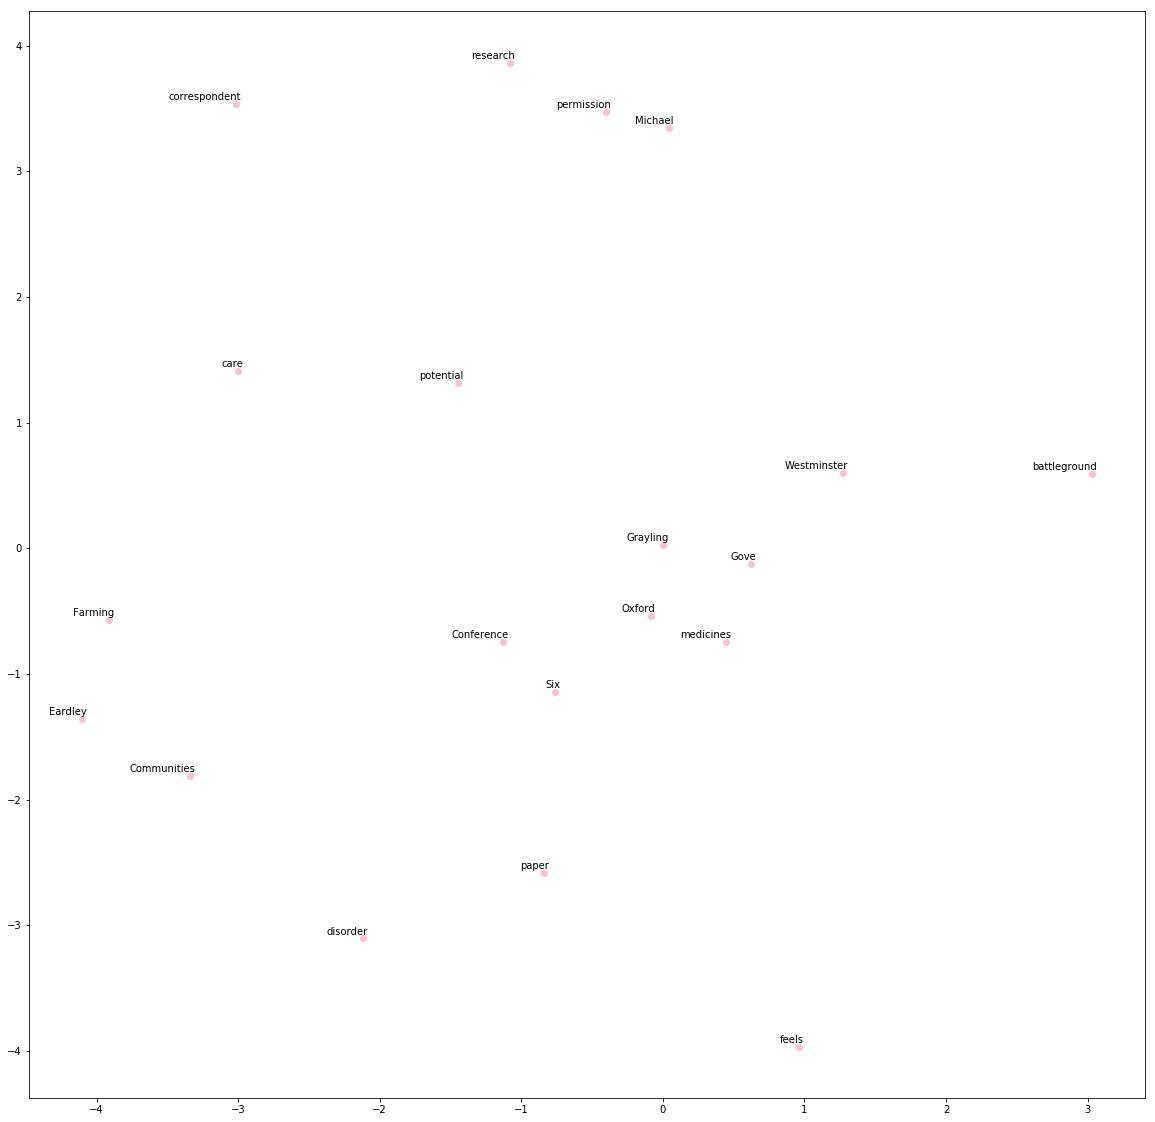

In [16]:

numberOfWords = 20
wordInfo = []

for topicIndex in range (2, 3):
    word2vecProcessor.setTopicFilter(topicIndex)
    wordInfo += word2vecProcessor.getPoints(numberOfWords)
    
processedWords = []
removeWords = ['support', 'peopl', 'govern', 'brexit', 'north']
for word in wordInfo:
    print('x:', word['x'], 'y: ', word['y'], ' --- ', word['stemmed_word'])
    if word['stemmed_word'] not in removeWords:
        processedWords.append(word)
plotProcessor = Plotter(processedWords)
plotProcessor.displayPlot()

